<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Autoencoders. In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime locally, on AWS SageMaker, on Colab or on a comparable environment. If something is running longer, double check your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a LSTM classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for object detection
* <a href="#p3">Part 3</a>: Describe a use case for an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - LSTMSs

Use a LSTM to fit a multi-class classification model on Reuters news articles to distinguish topics of articles. The data is already encoded properly for use in a LSTM model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well as the LSTM code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [19]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [37]:
# Imports

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

# Variables

batch_size = 64
max_features = len(word_index.values()) + 1
maxlen = 200

# Verifying shape

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

# Build model and summary
print('Build model...')
model = Sequential()
model.add(Embedding(max_features+1, 64))
model.add(LSTM(128))
model.add(Dense(max_features, activation='softmax'))

model.summary()

8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...
Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 64)          1982784   
_________________________________________________________________
lstm_11 (LSTM)               (None, 128)               98816     
_________________________________________________________________
dense_15 (Dense)             (None, 30980)             3996420   
Total params: 6,078,020
Trainable params: 6,078,020
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Training...')

# Fit model
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=10,
          validation_data=(X_test, y_test))


# Scores and Accuracy
score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)

print('Test score:', score)
print('Test accuracy:', acc)

Training...
Epoch 1/10
141/141 [==============================] - 6s 41ms/step - loss: 3.8997 - accuracy: 0.3483 - val_loss: 2.4040 - val_accuracy: 0.3664
Epoch 2/10
141/141 [==============================] - 5s 39ms/step - loss: 2.4419 - accuracy: 0.3506 - val_loss: 2.4077 - val_accuracy: 0.3664
Epoch 3/10
141/141 [==============================] - 5s 39ms/step - loss: 2.4331 - accuracy: 0.3506 - val_loss: 2.3992 - val_accuracy: 0.3664
Epoch 4/10
141/141 [==============================] - 5s 39ms/step - loss: 2.4350 - accuracy: 0.3506 - val_loss: 2.3992 - val_accuracy: 0.3664
Epoch 5/10
141/141 [==============================] - 5s 39ms/step - loss: 2.4325 - accuracy: 0.3506 - val_loss: 2.3906 - val_accuracy: 0.3664
Epoch 6/10
141/141 [==============================] - 6s 40ms/step - loss: 2.4364 - accuracy: 0.3506 - val_loss: 2.3924 - val_accuracy: 0.3664
Epoch 7/10
141/141 [==============================] - 6s 40ms/step - loss: 2.4350 - accuracy: 0.3506 - val_loss: 2.3878 - val_accu

## Tried to tweak a few things, kept it simple as possible, always hover around 32-36% accuracy with no significant leaps, going to keep moving.

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

### Answer: T**he pad_sequences method adjusts dataset data and makes it so that all samples are relatively uniform. It does this by adding leading zeroes to the data until it is on par with all other samples.**



## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

### Answer: **The main reason for using LSTM over a traditional RNN is, as emblematic in the name, because of the way LSTMs are able to retain data from prior epochs.  The architechture makes it so that it weighs previous information a lot more and a lot longer at the gate-level.**



## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

### 

1.    One example is, as we demonstrated and learned in class, language generation. You are able to feed the model a given set of rich text, and over time it is able to mimick what it is getting fed, sometimes to an alarmingly accurate degree (but most of the time its just funny).
2.   Another would be in hand writing generation. LSTM and RNN are decent at this application due to their ability to break down the seemingly inperceptible patterns that exist in handwriting versus numbers or regular typed text. It is then able to use what it learned in previous epochs to create the various things that look like specific curves and squiggles to us that make up handwritten text. It does a decent approximation!
3. The third would be in video to text, as in taking videos with speech in them and being able to turn that into written form. The way it does this is the lstm learns to associate a certain sequences of frames in a video to the words. Over time this develops an interesting and effective way of generating the text. 




<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and [ResNet50v2](https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet_v2) (pre-trained) to detect which of the images with the `frog_images` subdirectory has a frog in it. Note: You will need to upload the images to Colab. 

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>

The skimage function below will help you read in all the frog images into memory at once. You should use the preprocessing functions that come with ResnetV2 to help resize the images prior to inference. 

In [47]:
from skimage.io import imread_collection

images = imread_collection('/content/frog_images/.*.jpg')
print(len(images))

# not sure why this isn't working, will do the method from assignment 2 (mountains and forests)

0


In [0]:
import os, sys
img_dir = "/content/data"

# Loading in the images to a list
images = [f for f in os.listdir(img_dir) if os.path.isfile(os.path.join(
    img_dir, f)) and f[-3:] == 'jpg']

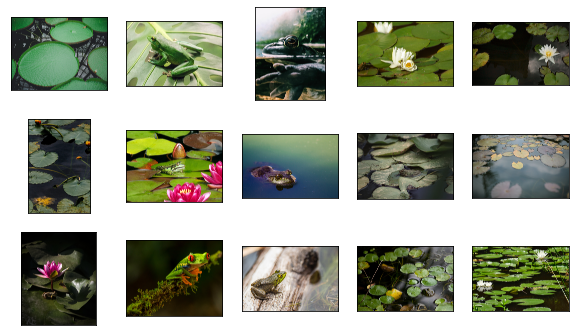

In [52]:
import matplotlib.pyplot as plt
import skimage
from skimage.io import imread

img_list = []
for img in os.listdir(img_dir):
    if img[-3:] == 'jpg':
        img_list.append(skimage.io.imread(f'/content/data/{img}'))

# Showing the images

plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img_list[i], cmap=plt.cm.binary)
plt.show()

Your goal is to validly run ResNet50v2 on the input images - don't worry about tuning or improving the model. Print out the predictions in any way you see fit. 

*Hint* - ResNet 50v2 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals:* 
- Check for other things such as fish.
- Print out the image with its predicted label
- Wrap everything nicely in well documented fucntions

In [0]:
# imports
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, decode_predictions, preprocess_input

frogs = ['bullfrog', 'tree_frog', 'tailed_frog']

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE (Its a frog!) or FALSE (Its not a frog)
    
    """
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50V2(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for result in results:
        if result[1] in frogs:
            return 'Its a frog!'
        else:
          pass
    return 'Its not a frog'

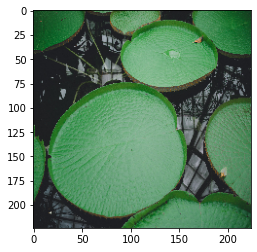

102875136/102869336 [==============================] - 2s 0us/step
[('n04258138', 'solar_dish', 0.2639014), ('n03249569', 'drum', 0.23506577), ('n03250847', 'drumstick', 0.050987415)]
Its not a frog



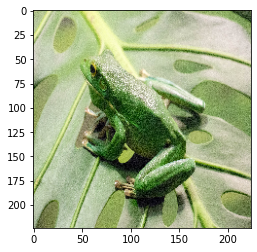

[('n01644373', 'tree_frog', 0.9560946), ('n01644900', 'tailed_frog', 0.04311649), ('n01641577', 'bullfrog', 0.00076296506)]
Its a frog!



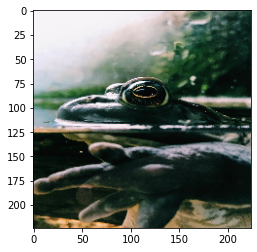

[('n01641577', 'bullfrog', 0.9959907), ('n02655020', 'puffer', 0.0024456005), ('n01667778', 'terrapin', 0.0010096631)]
Its a frog!



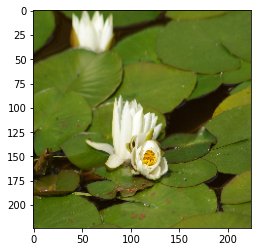

[('n01944390', 'snail', 0.8160966), ('n02280649', 'cabbage_butterfly', 0.027272237), ('n01737021', 'water_snake', 0.022942452)]
Its not a frog



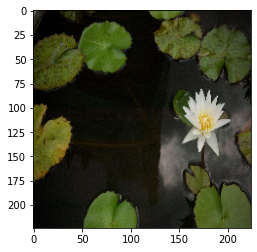

[('n04476259', 'tray', 0.34925258), ('n11939491', 'daisy', 0.29559553), ('n03485794', 'handkerchief', 0.09576842)]
Its not a frog



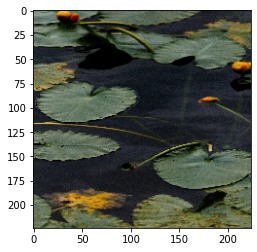

[('n12620546', 'hip', 0.3828702), ('n12267677', 'acorn', 0.105835915), ('n01737021', 'water_snake', 0.061507903)]
Its not a frog



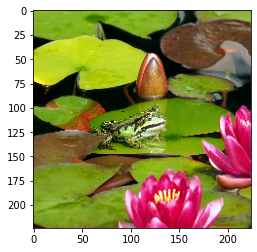

[('n02190166', 'fly', 0.9926561), ('n02206856', 'bee', 0.00468931), ('n02256656', 'cicada', 0.0009596424)]
Its not a frog



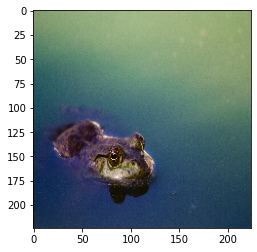

[('n01641577', 'bullfrog', 0.72788084), ('n02655020', 'puffer', 0.17467906), ('n02398521', 'hippopotamus', 0.043148853)]
Its a frog!



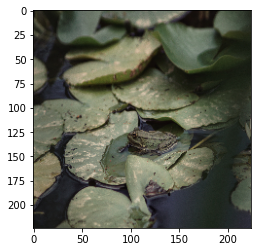

[('n01737021', 'water_snake', 0.30644122), ('n01945685', 'slug', 0.07309951), ('n13044778', 'earthstar', 0.0719982)]
Its not a frog



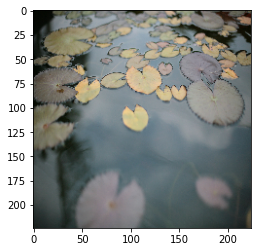

[('n04033995', 'quilt', 0.27399582), ('n11939491', 'daisy', 0.17837097), ('n04209239', 'shower_curtain', 0.07157751)]
Its not a frog



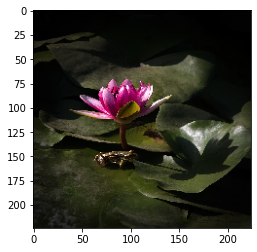

[('n03991062', 'pot', 0.43382093), ('n04522168', 'vase', 0.1851965), ('n07745940', 'strawberry', 0.08433439)]
Its not a frog



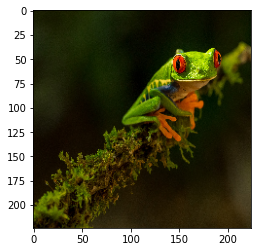

[('n01644373', 'tree_frog', 0.9961675), ('n01693334', 'green_lizard', 0.0020103618), ('n01644900', 'tailed_frog', 0.0013048043)]
Its a frog!



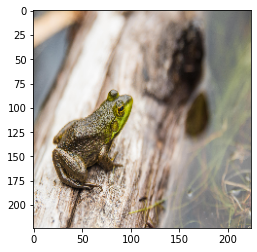

[('n01644900', 'tailed_frog', 0.67169285), ('n01644373', 'tree_frog', 0.27439037), ('n01641577', 'bullfrog', 0.048094425)]
Its a frog!



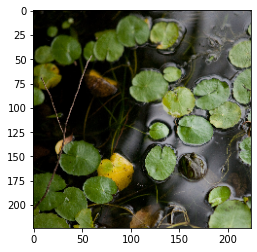

[('n03991062', 'pot', 0.47875488), ('n03697007', 'lumbermill', 0.0732952), ('n07734744', 'mushroom', 0.056395806)]
Its not a frog



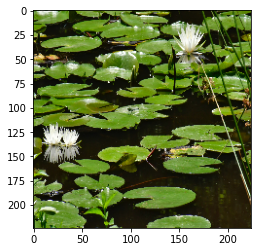

[('n11939491', 'daisy', 0.8145666), ('n03598930', 'jigsaw_puzzle', 0.08954889), ('n03457902', 'greenhouse', 0.0077825207)]
Its not a frog



In [57]:
# predict the frogs

path = '/content/data/'

paths = os.listdir(path)

for file in paths:
    img = process_img_path(path+file)
    plt.imshow(img)
    plt.show()
    prediction = img_contains_frog(img)
    print(prediction)
    print()

### Hey not bad! Looks like its working.

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 


<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

## My strongest area as an aspiring DS is my ability to think in Bayesean terms, and to be hyper skeptical about a lot of things. I rate very high in disagreeability and although for a personality that can be difficult, for a scientist its a very useful trait!

- What area of Data Science would you most like to learn more about, and why?
## The areas of DS I would most like to learn are classification models and applications to finance, namely and specificially applications of DS to the Bitcoin network.

- Where do you think Data Science will be in 5 years?

## I think DS will eventually become a necessary part of basic skills in most STEM and economics tracks. Essentially how it became necessary to know basics about computers or about specific programs like Excel on a basic level, except it will be REPLs and pandas/numpy/matplotlib.

- What are the threats posed by AI to our society?

## I'm honestly not that worried about general AI. It seems like a very hard problem. There is a growing fear of a dystopian world where we basically "algorithm all the things" in a slow methodical fashion, just because of their obvious benefits versus traditional methods of human decision making, etc. Its important to consider the downsides of each and every implementation.

- How do you think we can counteract those threats? 
## I'm not sure. I think being cognizant that it could be an issue is a good start. One must not be pedantic or anti-progress, but it should be some distinct form of study in the same way that safety and ergonomics, etc are in other domains: an important part of the puzzle.

- Do you think achieving General Artifical Intelligence is ever possible?

## I think it is technically feasable, but that we have a very very long way to go.  I see many significant breakthroughs in our future, but general AI is going to be the holy grail for some time to come (barring gigantic universe-shattering breakthroughs and even then it would still be tough problem).

A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [59]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")

In [61]:
print("Yay!!")

Yay!!
